<center><h1>Letters Recognizer Using MNIST Dataset</h1></center>
<hr><hr>

<br><br><br><br><br>

<div class="alert alert-block" style="margin-top: 20px">
    <h4>
        Released By El Houcine ES SANHAJI 
    </h4>
    Data Science Student
</div>

## Contents
<b>
    <ul>
        <li>1- Summary</li>
        <li>2- MNIST Dataset</li>
        <li>3- Letter Recognizer</li>
    </ul>
</b>


<br>

## 1- Summary

In this lab we will use MNIST Letters Dataset for applying the Data Mining technic that we learn in the class such as similarity, distance and correlation methods in the MNIST Dataset.
<br>
- #### Similatity
Jaccard Similarity Score<br>
Sorensen Similarity Score<br>
- #### Correlation Similarity Score
- #### Distance Similarity Score


<br>

## 2- MNIST Dataset

This package is a convenience wrapper around the EMNIST Dataset. The package provides functionality to automatically download and cache the dataset, and to load it as numpy arrays, minimizing the boilerplate necessary to make use of the dataset. (NOTE: The author of the Python package is not affiliated in any way with the authors of the dataset and the associated paper.)

#### Installation
To install the EMNIST Python package along with its dependencies, run the following command :<br>
``
pip install emnist
``

The dataset itself is automatically downloaded and cached when needed. To preemptively download the data and avoid a delay later during the execution of your program, execute the following command after installation :<br>
``
python -c "import emnist; emnist.ensure_cached_data()"
``

Alternately, if you have already downloaded the original IDX-formatted dataset from the EMNIST web page, copy or move it to ```~/.cache/emnist/```, where ```~``` is your home folder, and rename it from ```gzip.zip``` to ```emnist.zip```. The package will use the existing file rather than downloading it again.

<br>

## 3- Letters Recognizer

### Importing necessary libraries

The file ``requirements.txt`` contain the necessary libraries, so you need just to run this cell below.

In [38]:
%%capture
!pip install -r requirements.txt

Importing the necessary libraries such as numpy, pandas and scikit-learn and more.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from emnist import extract_training_samples
from emnist import list_datasets
from sklearn import datasets
from math import ceil, sqrt
from PIL import Image

This amazing one is to make the plots in line its mean the plots will show in notebook whis ggplot style.

In [40]:
%matplotlib inline
plt.style.use('ggplot')

Loading the letters dataset.

In [41]:
images, labels = extract_training_samples('letters')

#### Display list of images

This fuction to disply a list of images in one figure

In [42]:
def display_list_of_images(image_list):
    plt.figure(figsize=(10, 10))
    i = 1
    for image in image_list:
        nbr = ceil(sqrt(len(image_list)))
        plt.subplot(nbr, nbr, i)
        plt.imshow(image.image_color, plt.cm.binary)  
        i += 1
    plt.show()

#### Jaccard Similarity Score

In [43]:
def compute_jaccard_similarity_score(x, y):
    """
        Jaccard Similarity J (A,B) = | Intersection (A,B) | / | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

#### Sorensen Similarity Score

In [44]:
def compute_sorensen_similarity_score(x, y):
    """
        sorensen Similarity J (A,B) = | Intersection (A,B) | / | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y))) * 2
    sum_cardinality = len(set(x)) + len(set(y))
    return (intersection_cardinality / float(sum_cardinality))

#### Correlation Similarity Score

In [45]:
def compute_correlation_similarity_score(x, y):
    """
        Correlation Similarity Score
    """
    return np.corrcoef(x, y)[0][1]

#### Picture Class

This class contains all functions that i need for processing images.

In [46]:
class Picture:

    def __init__(self, id, label, image_color):
        self.id = id
        self.label = label
        self.image_color = image_color
        self.image_bw = self.to_black_and_white()
        self.vector = self.to_vector()
        self.descriptor = self.image_descriptor()
        self.temps = 0.0
        self.temps_additionnal = 0.0

    # image matrix to vector
    def to_vector(self):
        return np.array(self.image_bw).reshape(-1)

    # image color to black and white image
    def to_black_and_white(self):
        image_b_w = Image.fromarray(self.image_color)
        image_converted = image_b_w.convert('L')
        return np.array(image_converted)
    
    # image descriptor
    def image_descriptor(self):
        array = self.image_bw
        horz_proj = [np.count_nonzero(row) for row in array]
        img_trans = array.transpose()
        ver_proj = [np.count_nonzero(row) for row in img_trans]
        return horz_proj + ver_proj

    def show(self):
        print("=>> id\n{}".format(self.id))
        print("=>> label\n{}".format(self.label))
        print("=>> vector shape\n{}".format(self.vector.shape))
        print("=>> descriptor\n{}".format(self.descriptor))
        print("=>> temps\n{}".format(self.temps))
        print("\n")

    def __eq__(self, other):
        return self.temps == other.temps and self.id == other.id

    def __lt__(self, other):
        return self.temps > other.temps

### The main script

In [ ]:
letters_array = np.array([])

for i in range(len(images)):
    letter = Picture(i, labels[i], images[i])
    letters_array = np.append(letters_array, letter)

The Letter object looks like.

In [ ]:
letters_array[10].show()

The image query.

In [ ]:
initial_letter = letters_array[10]

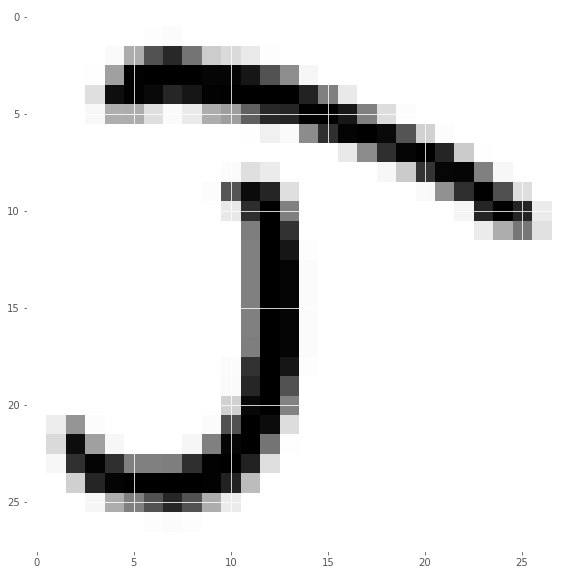

In [50]:
display_list_of_images([initial_letter])

<br>

### Using Descriptor Method

You can use the function that you want such as :
- For Correlation : ``compute_correlation_similarity_score``
- Similarity By Jaccard : ``compute_jaccard_similarity_score``
- Similarity By Sorensen : ``compute_sorensen_similarity_score``

All those functions applying to Image Vector.

In [51]:
for letter in letters_array:
    letter.temps = compute_correlation_similarity_score(initial_letter.descriptor, letter.descriptor)

Sorting the The array to choose the first 10 letters.

In [52]:
print("<< {} >>".format(initial_letter.label))

<< 10 >>


Showing the first 10 Letters.

In [53]:
letters_array.sort()

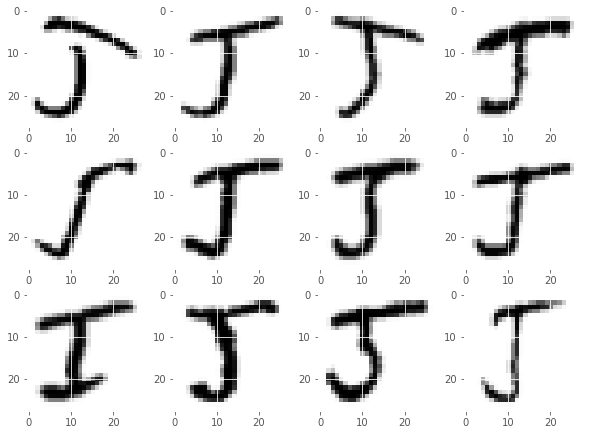

In [54]:
display_list_of_images(letters_array[0:12])

<br>

### Using Pixel to Pixel Method

You can use the function that you want such as :
- For Correlation : ``compute_correlation_similarity_score``
- Similarity By Jaccard : ``compute_jaccard_similarity_score``
- Similarity By Sorensen : ``compute_sorensen_similarity_score``

All those functions applying to Image Vector.

In [55]:
for letter in letters_array:
    letter.temps = compute_correlation_similarity_score(initial_letter.vector, letter.vector)

Sorting the The array to choose the first 10 letters.

In [56]:
letters_array.sort()

Showing the first 10 Letters.

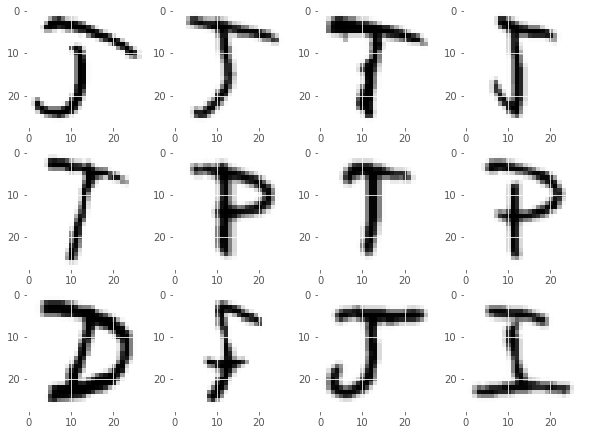

In [57]:
display_list_of_images(letters_array[0:12])

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b>
        According to the above results, the correlation method using pixel by pixel comparison seems to have the best performances.
    </b>
<br>
</div>

<div class="alert alert-block" style="margin-top: 20px">
    <h4>
        Released By El Houcine ES SANHAJI 
    </h4>
    Data Science Student
</div>

# Thank You.